In [1]:
#BL.EN.U4AIE21075
#A1
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from glob import glob
import seaborn as sns
from scipy.signal import spectrogram

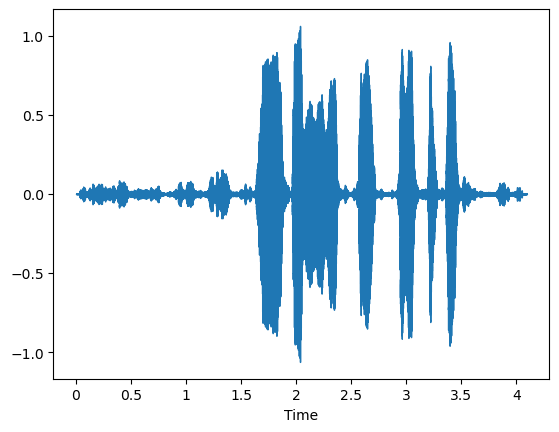

In [2]:
y, sr = librosa.load('recordd.wav')
librosa.display.waveshow(y)

In [3]:
a = glob('recordd.wav')
ipd.Audio(a[0])

In [4]:
fft_result = np.fft.fft(y)
print("after fft:")
ipd.display(ipd.Audio(fft_result, rate=sr))

after fft:


C:\ProgramData\anaconda3\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [5]:
amplitude_spectrum = np.abs(fft_result)
print("Amplitude Spectrum")
ipd.display(ipd.Audio(amplitude_spectrum, rate=sr))

Amplitude Spectrum


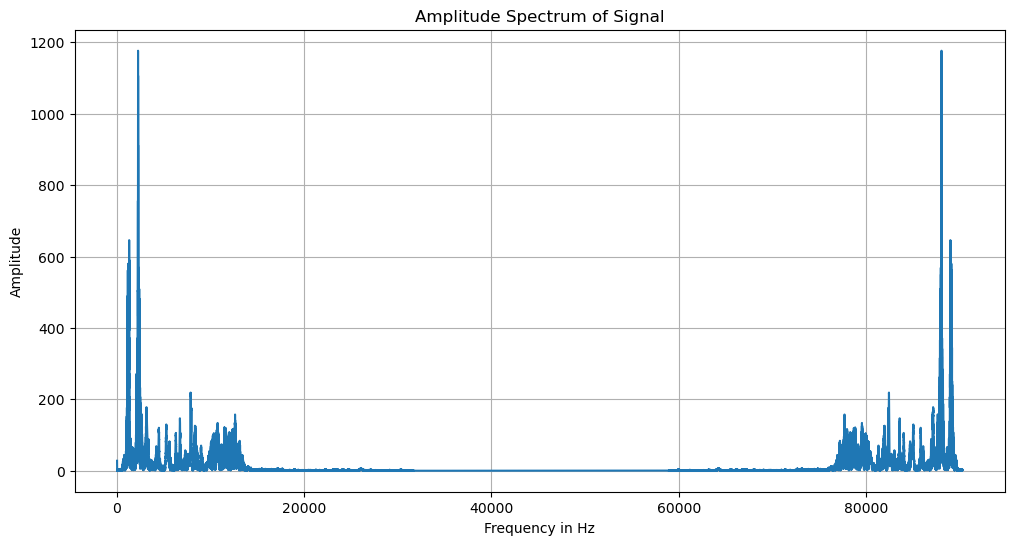

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [7]:
ifft_result = np.fft.ifft(fft_result)
print("After Reconstruction")
ipd.Audio(np.real(ifft_result), rate=sr)

After Reconstruction


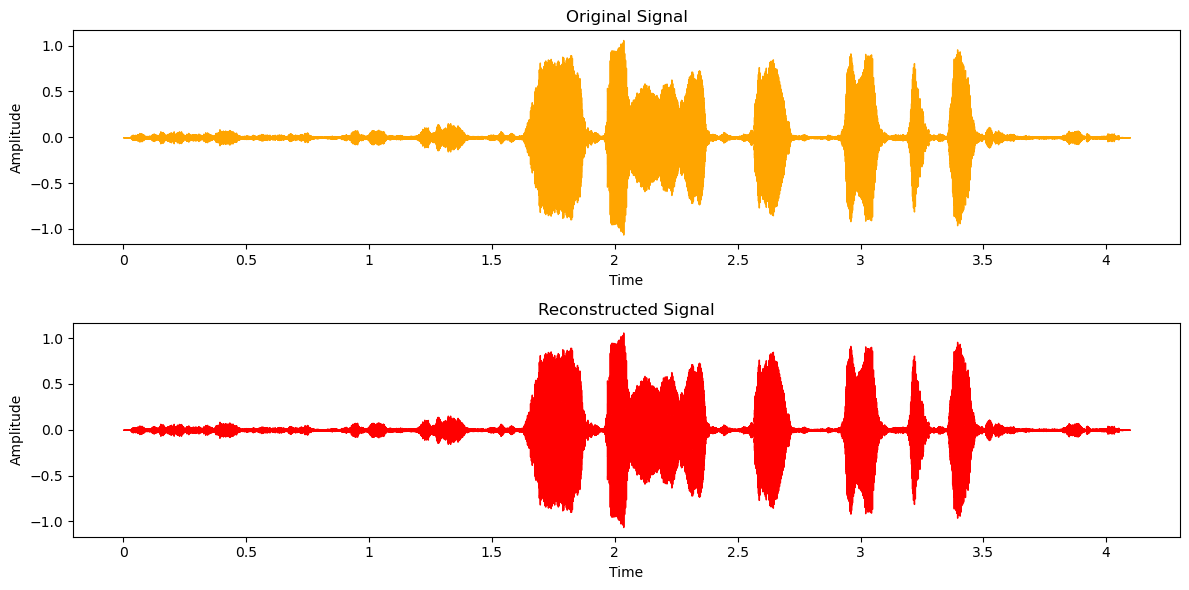

In [8]:
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='orange')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(ifft_result), sr=sr, color='red')  # Use np.real() to extract the real part
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [9]:
#A2
def apply_window_and_inverse_transform(fft_data, window):
    # Apply the window to the spectrum
    windowed_spectrum = fft_data * window

    # Inverse transform the filtered spectrum
    filtered_signal = np.fft.ifft(windowed_spectrum)

    return filtered_signal
low_pass_window = np.ones_like(fft_result)
low_pass_cutoff = 500  
low_pass_window[low_pass_cutoff:] = 0 
filtered_low_pass = apply_window_and_inverse_transform(fft_result, low_pass_window)

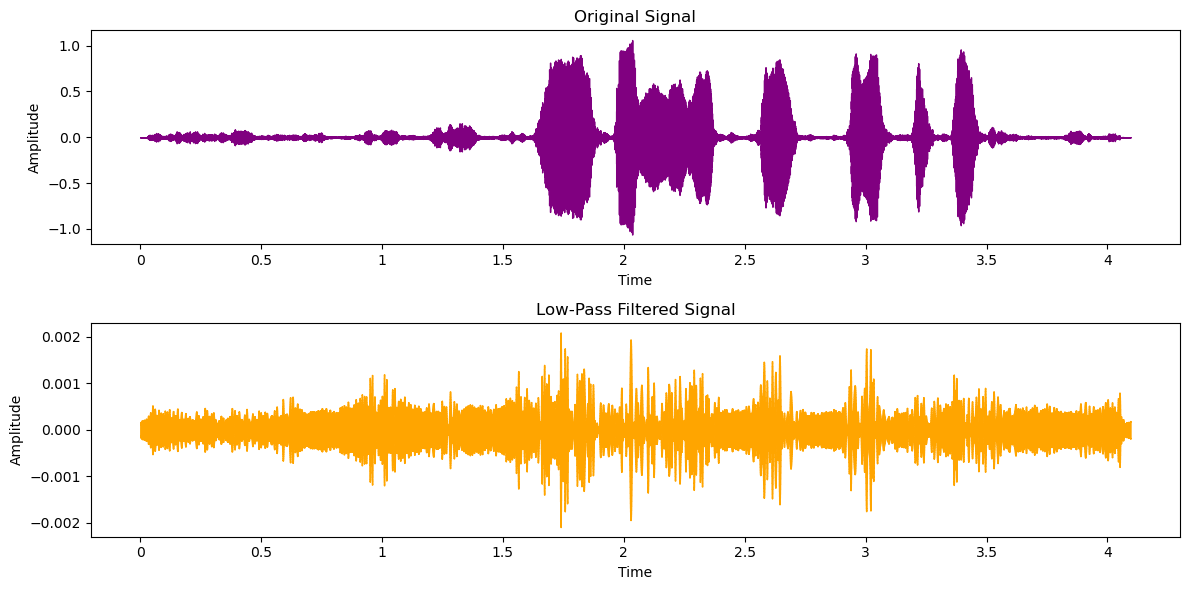

In [10]:
filtered_low_pass = apply_window_and_inverse_transform(fft_result, low_pass_window)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='purple')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(filtered_low_pass), sr=sr, color='orange')
plt.title('Low-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [11]:
ipd.Audio(np.real(filtered_low_pass), rate=sr)

In [12]:
#band-pass filter
bandpass_window = np.zeros_like(fft_result)
bandpass_low_cutoff = 500  
bandpass_high_cutoff = 1500  
bandpass_window[bandpass_low_cutoff:bandpass_high_cutoff] = 1

In [14]:
filtered_bandpass = apply_window_and_inverse_transform(fft_result, bandpass_window)

Text(100.97222222222221, 0.5, 'Amplitude')

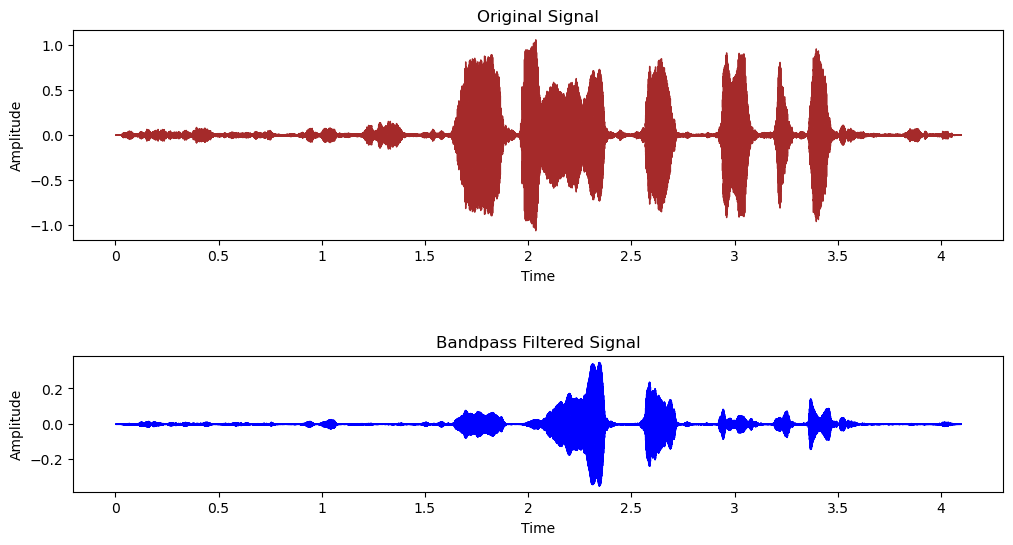

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='brown')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.subplot(3, 1, 3)
librosa.display.waveshow(np.real(filtered_bandpass), sr=sr, color='blue')
plt.title('Bandpass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [16]:
ipd.Audio(np.real(filtered_bandpass), rate=sr)

In [17]:
# High-pass filter window
high_pass_window = np.ones_like(fft_result)
high_pass_cutoff = 1500  
high_pass_window[:high_pass_cutoff] = 0  

In [18]:
filtered_high_pass = apply_window_and_inverse_transform(fft_result, high_pass_window)

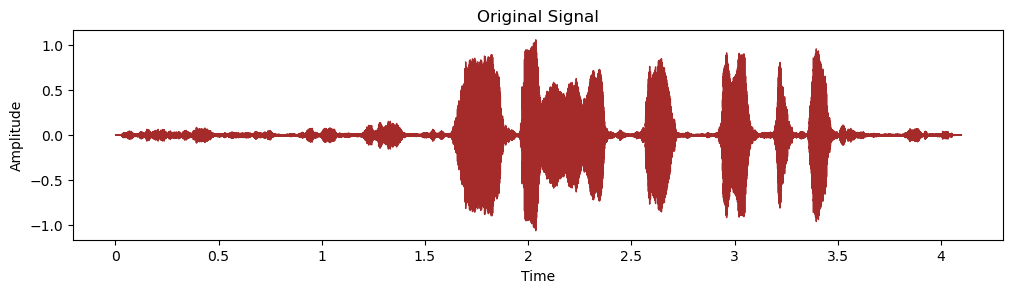

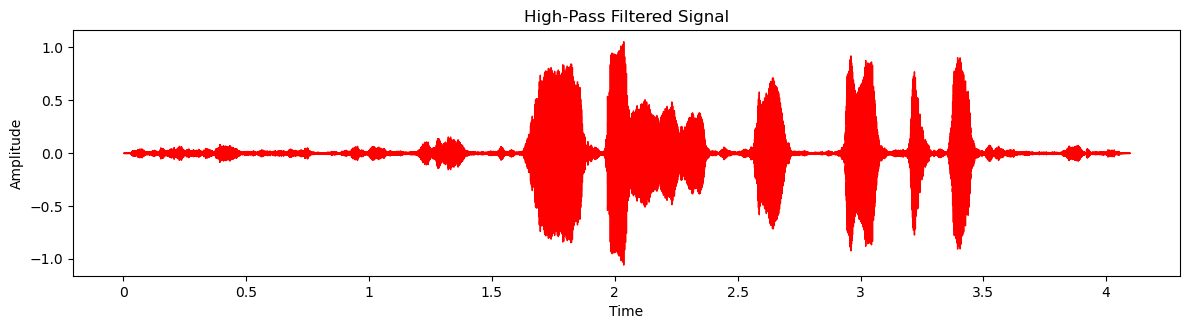

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='brown')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(np.real(filtered_high_pass), sr=sr, color='red')
plt.title('High-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [20]:
ipd.Audio(np.real(filtered_high_pass), rate=sr)

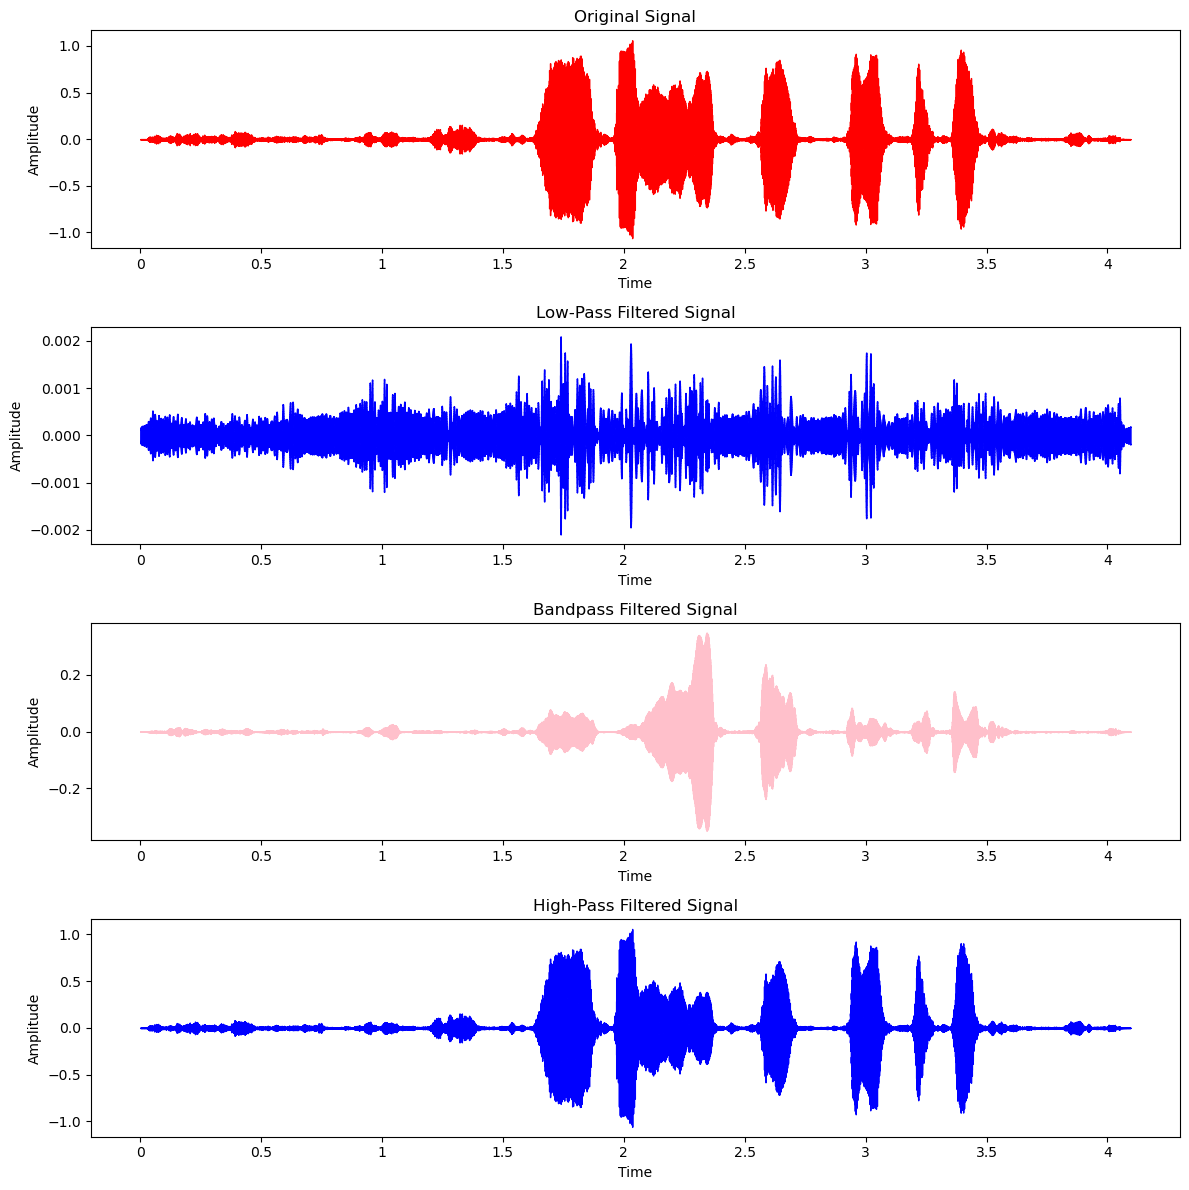

In [21]:
plt.figure(figsize=(12, 12))

# Original Speech Signal
plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr, color='red')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Low-Pass Filtered Speech Signal
plt.subplot(4, 1, 2)
librosa.display.waveshow(np.real(filtered_low_pass), sr=sr, color='blue')
plt.title('Low-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Bandpass Filtered Speech Signal
plt.subplot(4, 1, 3)
librosa.display.waveshow(np.real(filtered_bandpass), sr=sr, color='pink')
plt.title('Bandpass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# High-Pass Filtered Speech Signal
plt.subplot(4, 1, 4)
librosa.display.waveshow(np.real(filtered_high_pass), sr=sr, color='blue')
plt.title('High-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [22]:
#A3
cosine_window = np.cos(np.linspace(0, np.pi, len(fft_result)))
cosine_window /= np.max(cosine_window)  

In [23]:
filtered_cosine = apply_window_and_inverse_transform(fft_result, cosine_window)

Text(-4.527777777777784, 0.5, 'Amplitude')

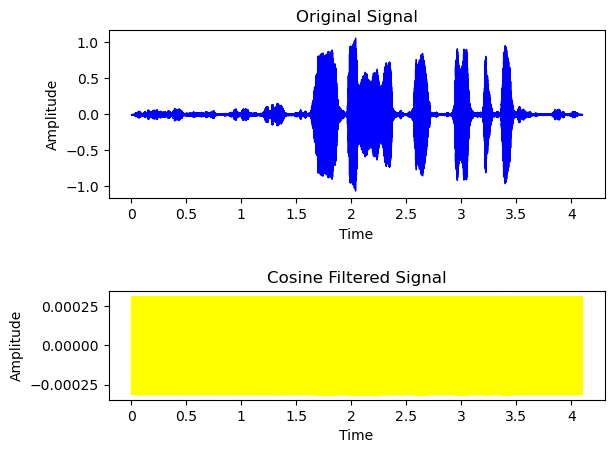

In [24]:
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='blue')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
librosa.display.waveshow(np.real(filtered_cosine), sr=sr, color='yellow')
plt.title('Cosine Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [25]:
ipd.Audio(np.real(filtered_cosine), rate=sr)

In [26]:
#gaussian
gaussian_window = np.exp(-(np.arange(len(fft_result)) - len(fft_result) / 2)**2 / (2 * (len(fft_result) / 8)**2))

In [27]:
filtered_gaussian = apply_window_and_inverse_transform(fft_result, gaussian_window)

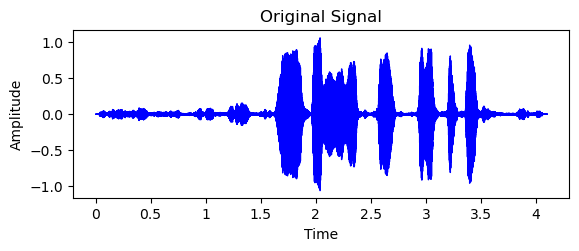

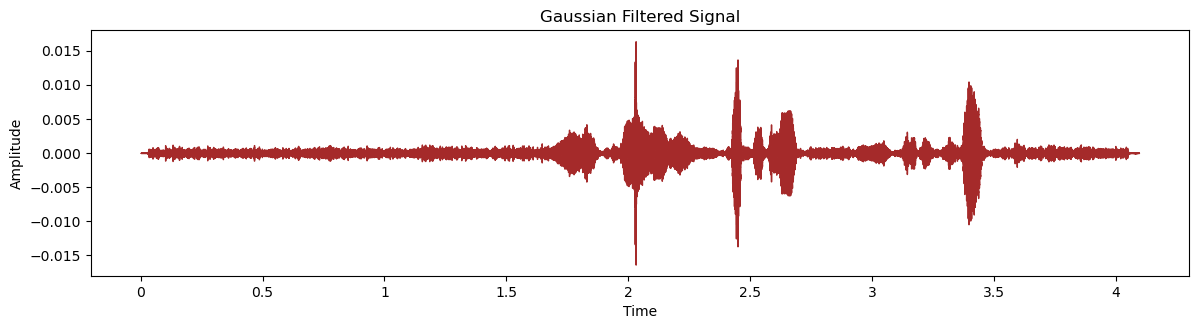

In [28]:
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='blue')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(filtered_gaussian), sr=sr, color='brown')
plt.title('Gaussian Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [29]:
ipd.Audio(np.real(filtered_gaussian), rate=sr)